In [1]:
import pandas as pd
import numpy as np
from functools import reduce
#import seaborn as sns
%matplotlib inline

In [2]:
alternative="variance_80bulk0_show_validation"
nr_replications=20
dic80_0_30={}
dic80_0_0={}

for i in range(1,nr_replications+1):
    j=str(i)
    dic_key="rep"+j
    dic80_0_30[dic_key]=pd.read_excel("Output_model_Experiment13_80bulk0_show30_extra5+prio2_Rep"+j+".xlsx")
    dic80_0_0[dic_key]=pd.read_excel("Output_model_Experiment13_80bulk0_show0_extra5+prio2_Rep" + j + ".xlsx")
                                     
dic_all={"dic80_0_30": dic80_0_30, "dic80_0_0": dic80_0_0}

In [3]:
dic_final={}
for key, values in dic_all.items():
    df_concat=pd.concat(values.values())
    by_row_index=df_concat.groupby(df_concat.index)
    df_means=by_row_index.mean()
    dic_final[key]=df_means
    column_list=[]
    for i in dic_final[key].columns:
        j=i+"_"+key
        column_list.append(j)
    dic_final[key].columns=column_list

In [4]:
dfs=[]
for key, values in dic_final.items():
    dfs.append(values)  
df_final = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True ,how='outer'), dfs)
df_final["Time"]=df_final['Time_dic80_0_30']/24
x_steps=df_final.shape[0]
x_steps

481

In [5]:
df_final[1:5]

Time_dic80_0_30  Dockselection_processed_dic80_0_30  \
1              1.0                                 6.1   
2              2.0                                 6.1   
3              3.0                                 6.8   
4              4.0                                 4.9   

   Unloading_processed_dic80_0_30  Regional_airport_processed_dic80_0_30  \
1                             0.2                                   20.0   
2                             1.8                                    0.0   
3                             4.6                                    0.0   
4                             4.7                                    0.0   

   Warehouse_processed_dic80_0_30  Distant_warehouse_processed_dic80_0_30  \
1                             0.0                                     0.0   
2                             0.0                                     0.0   
3                             0.0                                     0.0   
4                             0.0                                     0.0   

   Local_airport_processed_dic80_0_30  Time_average_taxi_dic80_0_30  \
1                                 0.0                      0.003679   
2                                 0.0                      0.036726   
3                                 0.0                      0.038815   
4                                 0.0                      0.120312   

   Time_average_unloading_dic80_0_30  Time_average_regional_dic80_0_30  \
1                           0.047772                               0.0   
2                           0.467095                               0.0   
3                           0.735252                               0.0   
4                           0.995389                               0.0   

     ...     cargo_at_dolly_unloading_dic80_0_0  cargo_at_breakdwon_dic80_0_0  \
1    ...                                    0.2                           0.0   
2    ...                                    2.0                           0.0   
3    ...                                    6.6                           0.0   
4    ...                                   11.3                           0.0   

   cargo_stored_dic80_0_0  cargo_at_distant_warehouses_dic80_0_0  \
1                     0.0                                    0.0   
2                     0.0                                    0.0   
3                     0.0                                    0.0   
4                     0.0                                    0.0   

   cargo_at_truck_dock_dic80_0_0  cargo_at_warehouse_dic80_0_0  \
1                            0.0                           0.2   
2                            0.0                           2.0   
3                            0.0                           6.6   
4                            0.0                          11.3   

   cargo_at_airbridge_dic80_0_0  Relief aid demand_dic80_0_0  \
1                           0.0                       5222.2   
2                           0.0                       5222.2   
3                           0.0                       5222.2   
4                           0.0                       5222.2   

   Priority_demand_fullfiled_dic80_0_0      Time  
1                                  0.0  0.041667  
2                                  0.0  0.083333  
3                                  0.0  0.125000  
4                                  0.0  0.166667  

[4 rows x 49 columns]

In [6]:
df_final2=df_final[:]

In [7]:
df_final2[['Dockselection_processed_dic80_0_30',
       'Unloading_processed_dic80_0_30', 'Warehouse_processed_dic80_0_30']]=df_final2[['Dockselection_processed_dic80_0_30',
       'Unloading_processed_dic80_0_30', 'Warehouse_processed_dic80_0_30']]*2.5
df_final2[['cargo_at_taxilane_dic80_0_30', 'carg_at_docks_dic80_0_30',
       'cargo_at_dolly_unloading_dic80_0_30',
       'cargo_at_breakdwon_dic80_0_30', 'cargo_stored_dic80_0_30',
       'cargo_at_truck_dock_dic80_0_30', 'cargo_at_warehouse_dic80_0_30']]=df_final2[['cargo_at_taxilane_dic80_0_30', 'carg_at_docks_dic80_0_30',
       'cargo_at_dolly_unloading_dic80_0_30',
       'cargo_at_breakdwon_dic80_0_30', 'cargo_stored_dic80_0_30',
       'cargo_at_truck_dock_dic80_0_30', 'cargo_at_warehouse_dic80_0_30']]*2.5


df_final2[['Dockselection_processed_dic80_0_0',
       'Unloading_processed_dic80_0_0', 'Warehouse_processed_dic80_0_0']]=df_final2[['Dockselection_processed_dic80_0_0',
       'Unloading_processed_dic80_0_0', 'Warehouse_processed_dic80_0_0']]*2.5
df_final2[['cargo_at_taxilane_dic80_0_0', 'carg_at_docks_dic80_0_0',
       'cargo_at_dolly_unloading_dic80_0_0',
       'cargo_at_breakdwon_dic80_0_0', 'cargo_stored_dic80_0_0',
       'cargo_at_truck_dock_dic80_0_0', 'cargo_at_warehouse_dic80_0_0']]=df_final2[['cargo_at_taxilane_dic80_0_0', 'carg_at_docks_dic80_0_0',
       'cargo_at_dolly_unloading_dic80_0_0',
       'cargo_at_breakdwon_dic80_0_0', 'cargo_stored_dic80_0_0',
       'cargo_at_truck_dock_dic80_0_0', 'cargo_at_warehouse_dic80_0_0']]*2.5

Dockselection_processed_dic80_0_30 = 14345.5
Dockselection_processed_dic80_0_0 = 14850.5
Unloading_processed_dic80_0_30 = 14262.25
Unloading_processed_dic80_0_0 = 14792.75
Warehouse_processed_dic80_0_30 = 10816.25
Warehouse_processed_dic80_0_0 = 11440.125


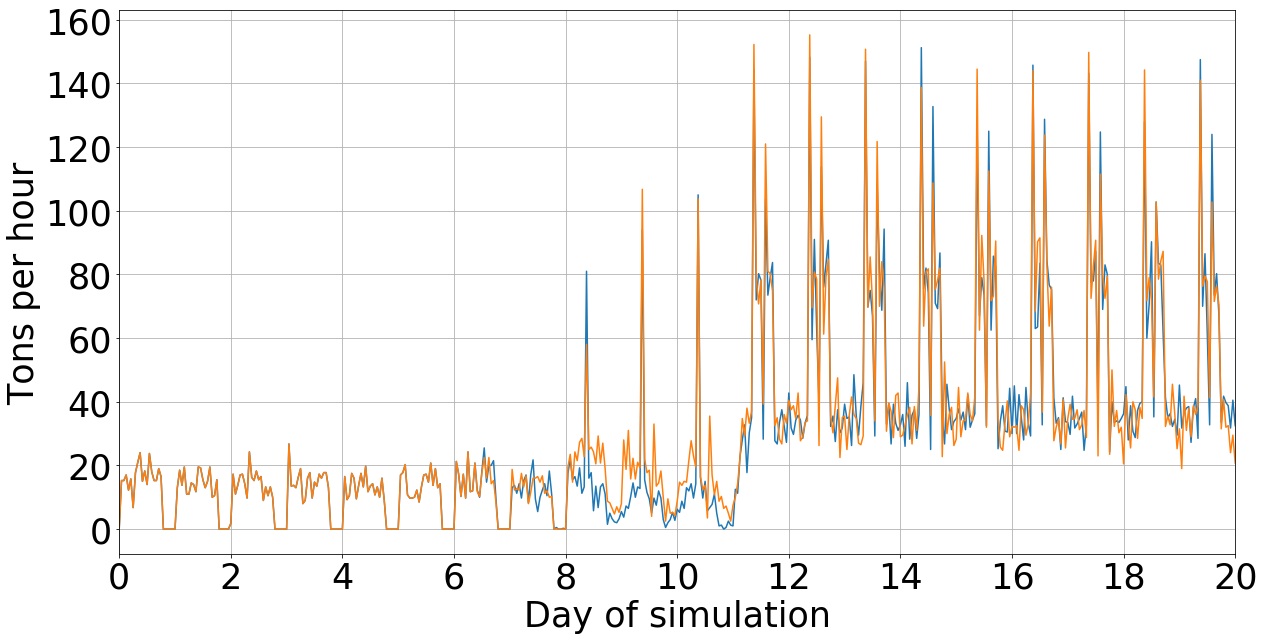

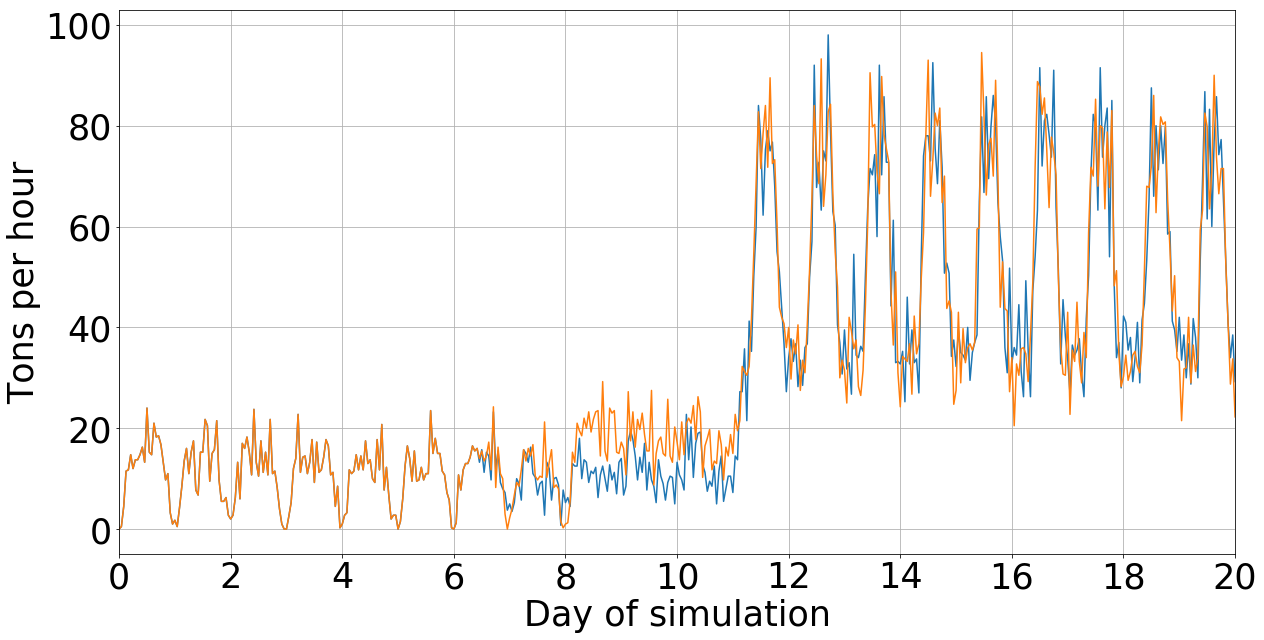

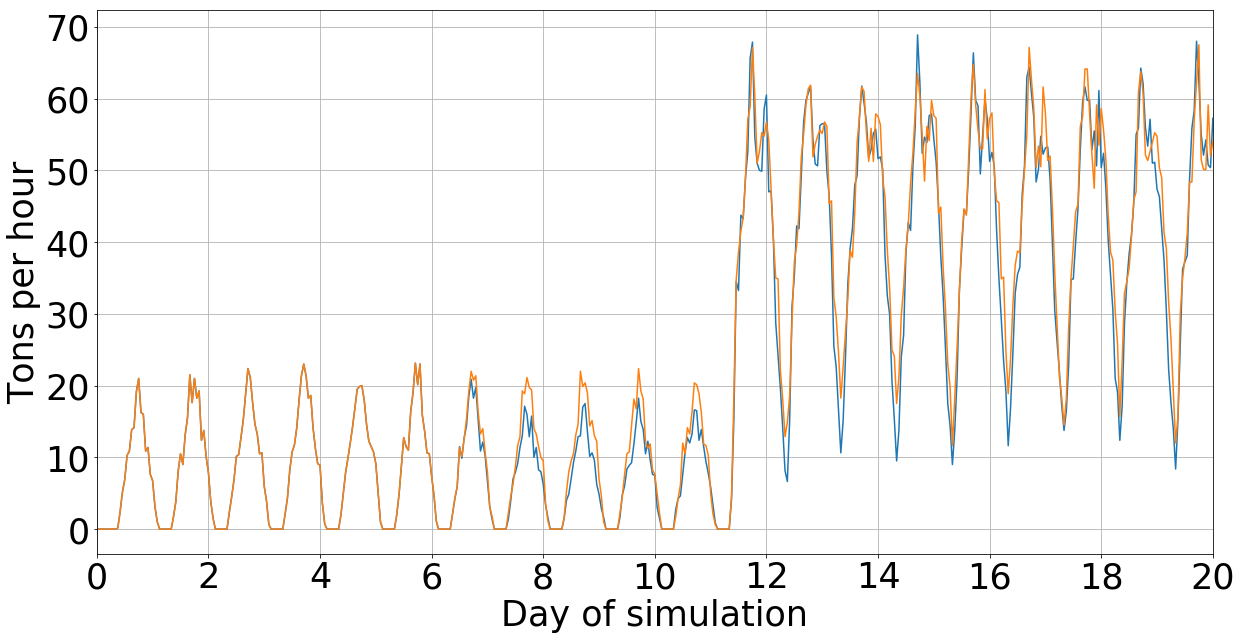

In [8]:
plot_proc_dock=df_final2.plot(grid=True, fontsize = 35 , legend= False, x="Time", y=["Dockselection_processed_dic80_0_30", "Dockselection_processed_dic80_0_0"] ,  xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_proc_dock.set_xlabel("Day of simulation", fontsize=35)
plot_proc_dock.set_ylabel("Tons per hour", fontsize=35)
fig=plot_proc_dock.get_figure()
fig.savefig("Results/Plots/"+alternative+"_processed_by_taxilane", bbox_inches='tight')
print("Dockselection_processed_dic80_0_30 = " + str(df_final2["Dockselection_processed_dic80_0_30"].sum(axis=0)))
print("Dockselection_processed_dic80_0_0 = " + str(df_final2["Dockselection_processed_dic80_0_0"].sum(axis=0)))

plot_proc_unload=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=["Unloading_processed_dic80_0_30", "Unloading_processed_dic80_0_0"], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_proc_unload.set_xlabel("Day of simulation", fontsize=35)
plot_proc_unload.set_ylabel("Tons per hour", fontsize=35)
fig=plot_proc_unload.get_figure()
fig.savefig("Results/Plots/"+alternative+"_processed_at_unloading", bbox_inches='tight')
print("Unloading_processed_dic80_0_30 = " + str(df_final2["Unloading_processed_dic80_0_30"].sum(axis=0)))
print("Unloading_processed_dic80_0_0 = " + str(df_final2["Unloading_processed_dic80_0_0"].sum(axis=0)))

plot_proc_ware=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['Warehouse_processed_dic80_0_30', 'Warehouse_processed_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_proc_ware.set_xlabel("Day of simulation", fontsize=35)
plot_proc_ware.set_ylabel("Tons per hour", fontsize=35)
fig=plot_proc_ware.get_figure()
fig.savefig("Results/Plots/"+alternative+"_processed_at_warehouse", bbox_inches='tight')
print("Warehouse_processed_dic80_0_30 = " + str(df_final2["Warehouse_processed_dic80_0_30"].sum(axis=0)))
print("Warehouse_processed_dic80_0_0 = " + str(df_final2["Warehouse_processed_dic80_0_0"].sum(axis=0)))


Time_average_taxi_dic80_0_30 = 12.73039368825226
Time_average_taxi_dic80_0_0 = 7.457698722792323
Time_average_unloading_dic80_0_30 = 2.3010171219558386
Time_average_unloading_dic80_0_0 = 1.977182901749796
Time_average_warehouse_dic80_0_30 = 195.6421029926655
Time_average_warehouse_dic80_0_0 = 195.10396709398302


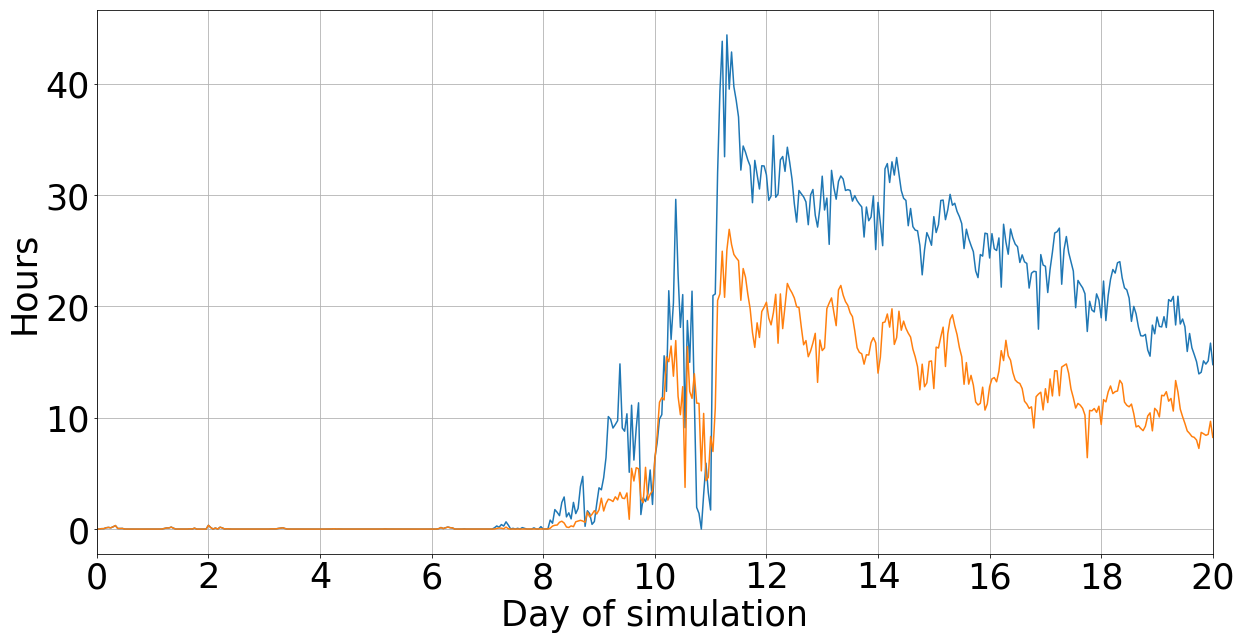

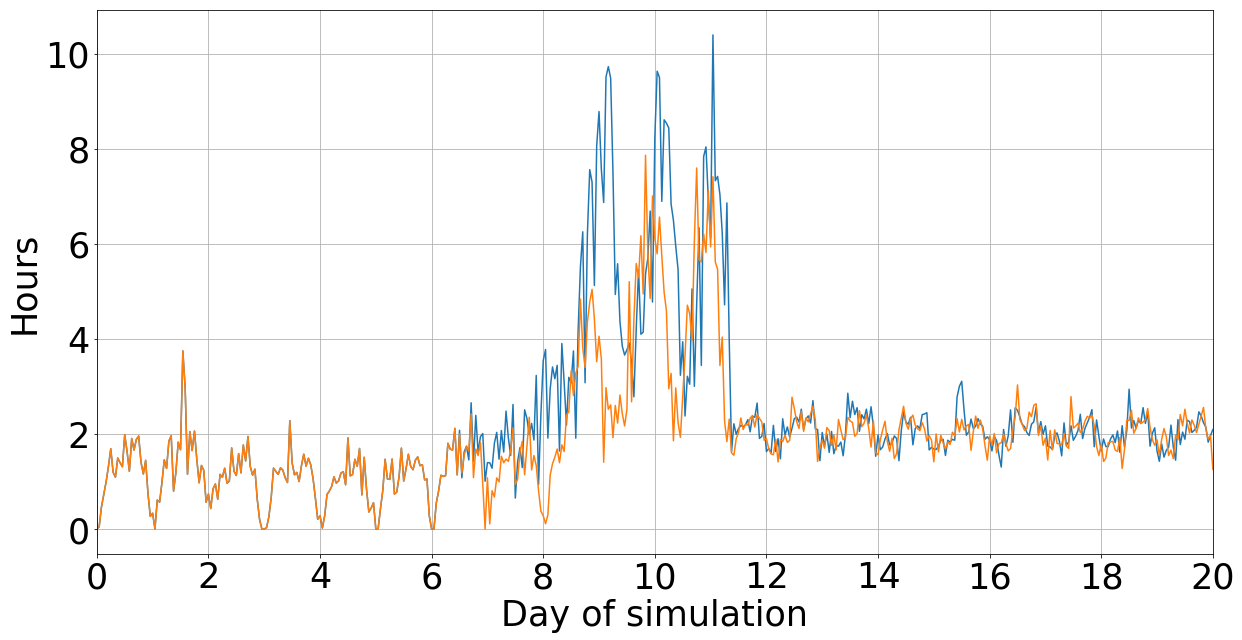

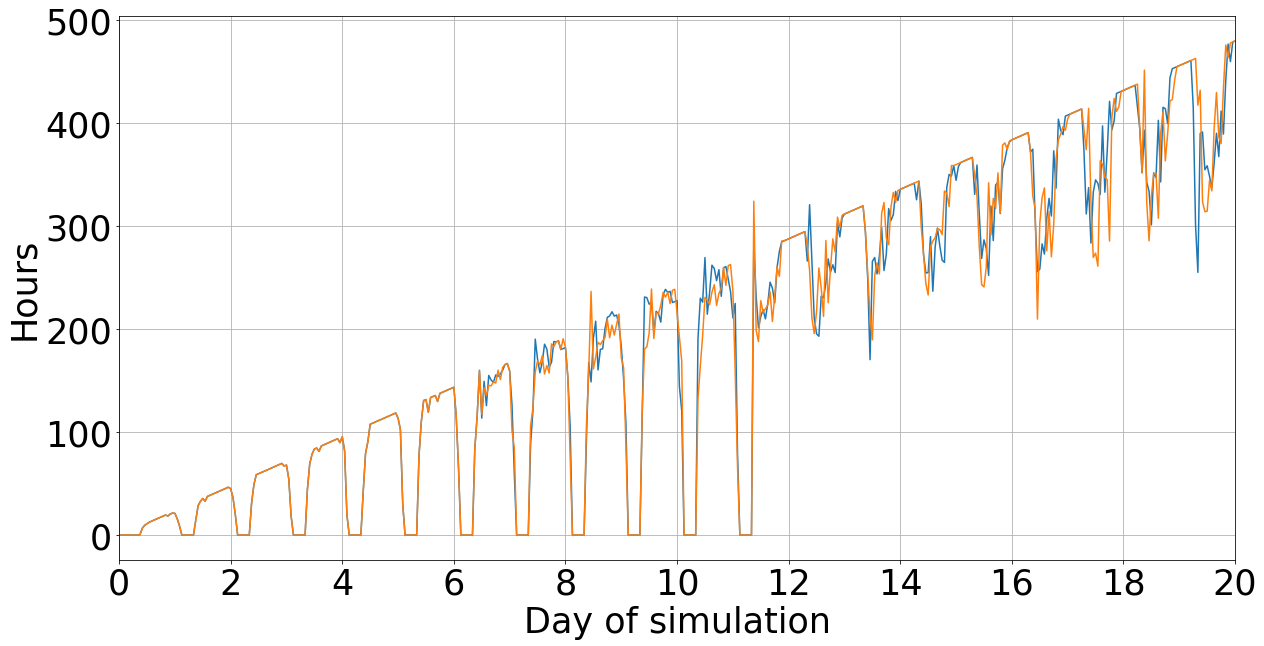

In [9]:
#throughput times
plot_time_dock=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['Time_average_taxi_dic80_0_30', 'Time_average_taxi_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_time_dock.set_xlabel("Day of simulation", fontsize=35)
plot_time_dock.set_ylabel("Hours", fontsize=35)
fig=plot_time_dock.get_figure()
fig.savefig("Results/Plots/"+alternative+"_taxi_time", bbox_inches='tight')
print("Time_average_taxi_dic80_0_30 = " + str(df_final2["Time_average_taxi_dic80_0_30"].mean(axis=0)))
print("Time_average_taxi_dic80_0_0 = " + str(df_final2["Time_average_taxi_dic80_0_0"].mean(axis=0)))

plot_time_unloading=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['Time_average_unloading_dic80_0_30', 'Time_average_unloading_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_time_unloading.set_xlabel("Day of simulation", fontsize=35)
plot_time_unloading.set_ylabel("Hours", fontsize=35)
fig=plot_time_unloading.get_figure()
fig.savefig("Results/Plots/"+alternative+"_unloading_time", bbox_inches='tight')
print("Time_average_unloading_dic80_0_30 = " + str(df_final2["Time_average_unloading_dic80_0_30"].mean(axis=0)))
print("Time_average_unloading_dic80_0_0 = " + str(df_final2["Time_average_unloading_dic80_0_0"].mean(axis=0)))

plot_time_warehouse=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['Time_average_warehouse_dic80_0_30', 'Time_average_warehouse_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_time_warehouse.set_xlabel("Day of simulation", fontsize=35)
plot_time_warehouse.set_ylabel("Hours", fontsize=35)
fig=plot_time_warehouse.get_figure()
fig.savefig("Results/Plots/"+alternative+"_warehouse_time", bbox_inches='tight')
print("Time_average_warehouse_dic80_0_30 = " + str(df_final2["Time_average_warehouse_dic80_0_30"].mean(axis=0)))
print("Time_average_warehouse_dic80_0_0 = " + str(df_final2["Time_average_warehouse_dic80_0_0"].mean(axis=0)))

cargo_at_taxilane_dic80_0_30 = 692.5161122661123
cargo_at_taxilane_dic80_0_0 = 406.1491683991684
cargo_at_dolly_unloading_dic80_0_30 = 595.1850311850312
cargo_at_dolly_unloading_dic80_0_0 = 625.7045218295218
cargo_at_warehouse_dic80_0_30 = 1179.1995841995843
cargo_at_warehouse_dic80_0_0 = 1260.946205821206


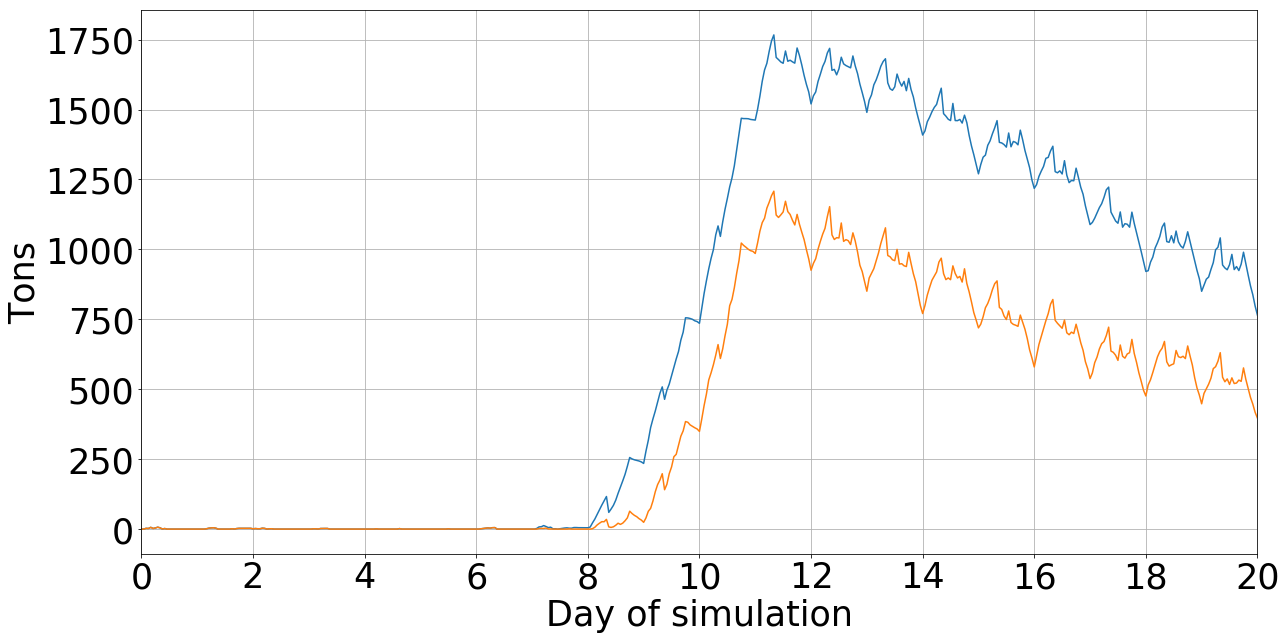

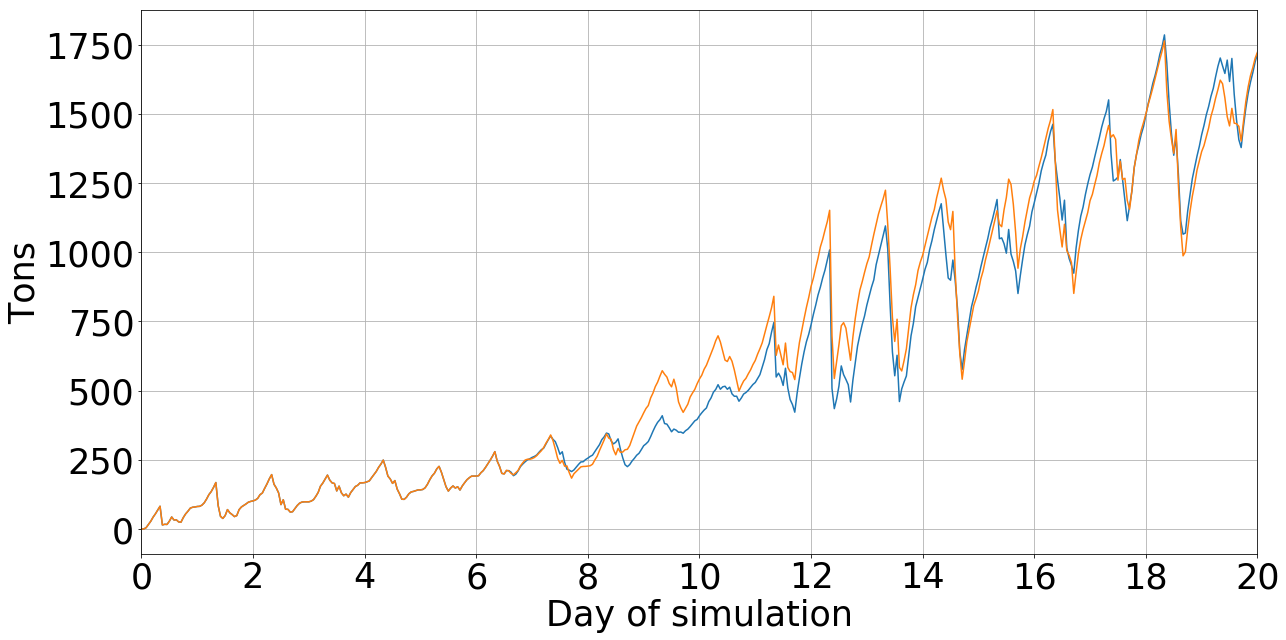

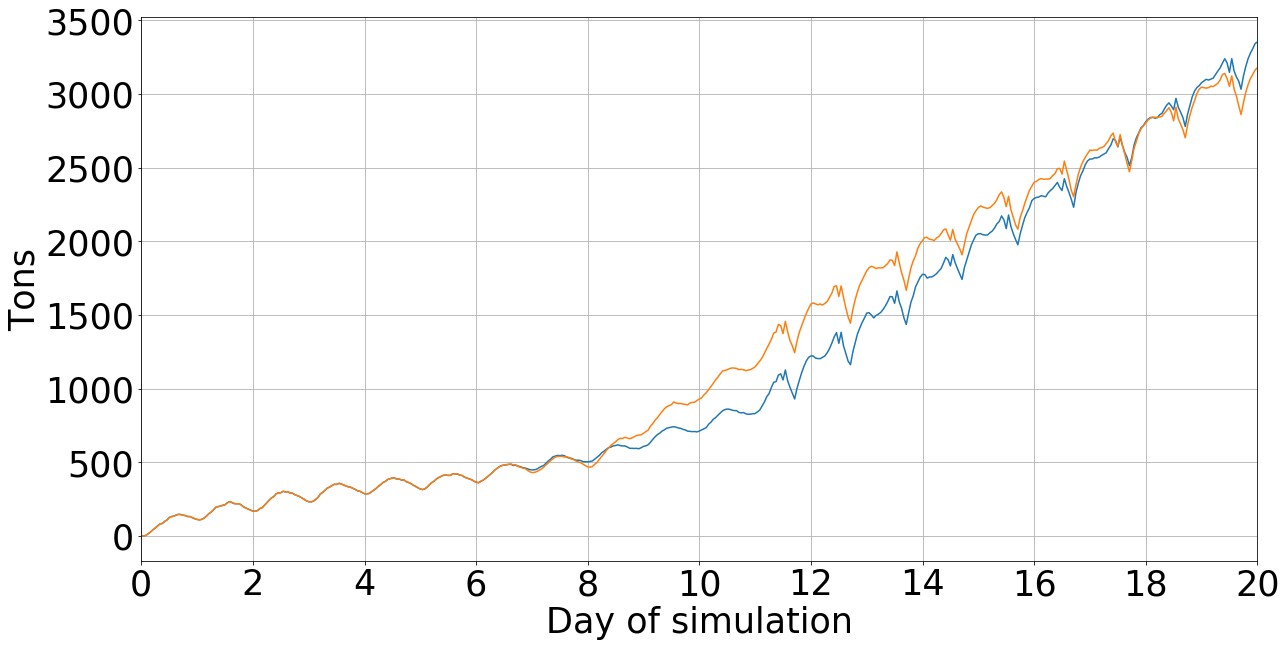

In [11]:
plot_idle_dock=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=["cargo_at_taxilane_dic80_0_30", "cargo_at_taxilane_dic80_0_0"], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_idle_dock.set_xlabel("Day of simulation", fontsize=35)
plot_idle_dock.set_ylabel("Tons", fontsize=35)
fig=plot_idle_dock.get_figure()
fig.savefig("Results/Plots/"+alternative+"_idle_at_taxilane", bbox_inches='tight')
print("cargo_at_taxilane_dic80_0_30 = " + str(df_final2["cargo_at_taxilane_dic80_0_30"].mean(axis=0)))
print("cargo_at_taxilane_dic80_0_0 = " + str(df_final2["cargo_at_taxilane_dic80_0_0"].mean(axis=0)))

plot_idle_unloading=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['cargo_at_dolly_unloading_dic80_0_30', 'cargo_at_dolly_unloading_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_idle_unloading.set_xlabel("Day of simulation", fontsize=35)
plot_idle_unloading.set_ylabel("Tons", fontsize=35)
fig=plot_idle_unloading.get_figure()
fig.savefig("Results/Plots/"+alternative+"_idle_at_unloading", bbox_inches='tight')
print("cargo_at_dolly_unloading_dic80_0_30 = " + str(df_final2["cargo_at_dolly_unloading_dic80_0_30"].mean(axis=0)))
print("cargo_at_dolly_unloading_dic80_0_0 = " + str(df_final2["cargo_at_dolly_unloading_dic80_0_0"].mean(axis=0)))

plot_idle_warehouse=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['cargo_at_warehouse_dic80_0_30', 'cargo_at_warehouse_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_idle_warehouse.set_xlabel("Day of simulation", fontsize=35)
plot_idle_warehouse.set_ylabel("Tons", fontsize=35)
fig=plot_idle_warehouse.get_figure()
fig.savefig("Results/Plots/"+alternative+"_idle_at_warehouse", bbox_inches='tight')
print("cargo_at_warehouse_dic80_0_30 = " + str(df_final2["cargo_at_warehouse_dic80_0_30"].mean(axis=0)))
print("cargo_at_warehouse_dic80_0_0 = " + str(df_final2["cargo_at_warehouse_dic80_0_0"].mean(axis=0)))